Task 1: Handling Missing Values (Titanic Dataset)

●	Task: Identify missing values, decide whether to fill (mean/median/mode) or drop, and justify your choice.


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('Titanic.csv')

print("Initial DataFrame:",df.shape)
df.head()

Initial DataFrame: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percentage': missing_percent
})

print("Missing Value Report:")
missing_df

Missing Value Report:


,Missing Values,Percentage
Age,86,20.57
Cabin,327,78.23
Embarked,0,0.00
Fare,1,0.24
Name,0,0.00
Parch,0,0.00
PassengerId,0,0.00
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00


In [3]:
threshold = 0.4  
cols_to_drop = missing_df[missing_df['Percentage'] > (threshold*100)].index
df = df.drop(columns=cols_to_drop)
print("Dropped Columns:", cols_to_drop.tolist())

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("After Cleaning - Missing Values Check:")
df.isnull().sum()

Dropped Columns: ['Cabin']
After Cleaning - Missing Values Check:


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [4]:
df.to_csv(r"C:\Users\veerk\OneDrive\Desktop\ARCAP\Arcap_Reits\DS\Task1\cleaned\titanic_cleaned.csv", index=False)
print(" Cleaned Titanic dataset saved as 'titanic_cleaned.csv'")

 Cleaned Titanic dataset saved as 'titanic_cleaned.csv'


Explanation
1.Cabin column dropped because it has >70% missing values → too sparse.
2.Age filled with median (robust against outliers).

3.Embarked filled with mode (categorical).

4.Other columns have no significant missing data.

Task 02 Removing Duplicates (Netflix Dataset)

In [13]:
import pandas as pd

pd.set_option('display.max_columns', None)

df_netflix = pd.read_csv("netflix.csv")
print("Initial Netflix DataFrame:", df_netflix.shape)

df.head()

Initial Netflix DataFrame: (6104, 12)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [23]:
print(f"\nTotal duplicate rows: {df.duplicated().sum()}")


Total duplicate rows: 266


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('netflix.csv')


print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())


print(f"\nTotal duplicate rows: {df.duplicated().sum()}")


if 'show_id' in df.columns:
    print(f"Duplicate show_id: {df['show_id'].duplicated().sum()}")
if 'title' in df.columns:
    print(f"Duplicate titles: {df['title'].duplicated().sum()}")


duplicate_rows = df[df.duplicated(keep=False)] 
if not duplicate_rows.empty:
    print("\nDuplicate rows:")
    print(duplicate_rows.sort_values(by=df.columns[0]))


df_cleaned = df.drop_duplicates(keep='first')


if 'title' in df.columns:
    df_cleaned_title = df.drop_duplicates(subset=['title'], keep='first')


if all(col in df.columns for col in ['title', 'release_year']):
    df_cleaned_multi = df.drop_duplicates(subset=['title', 'release_year'], keep='first')


print(f"\nShape after removing all duplicates: {df_cleaned.shape}")
print(f"Rows removed: {len(df) - len(df_cleaned)}")


if 'title' in df.columns:
    print(f"Shape after removing title duplicates: {df_cleaned_title.shape}")


df_cleaned.to_csv('netflix_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'netflix_cleaned.csv'")


def find_similar_titles(df, title_column='title'):
    """Find potentially similar titles that might be duplicates"""
    from difflib import SequenceMatcher
    
    titles = df[title_column].dropna().unique()
    similar_pairs = []
    
    for i in range(len(titles)):
        for j in range(i+1, len(titles)):
            similarity = SequenceMatcher(None, titles[i].lower(), titles[j].lower()).ratio()
            if similarity > 0.8:  
                similar_pairs.append((titles[i], titles[j], similarity))
    
    return similar_pairs


if 'title' in df.columns and len(df) < 1000:  
    similar_titles = find_similar_titles(df)
    if similar_titles:
        print("\nPotentially similar titles (manual review needed):")
        for title1, title2, similarity in similar_titles:
            print(f"Similarity: {similarity:.2f} - '{title1}' vs '{title2}'")




print("\nMissing values in cleaned dataset:")
print(df_cleaned.isnull().sum())

Dataset shape: (6104, 12)

First few rows:
    show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14 

Task 3: Handling Outliers (House Prices Dataset)

In [3]:
import pandas as pd

house_df = pd.read_csv("House_Prices.csv")
print("Initial House Prices DataFrame:", house_df.shape)
house_df.head()

numeric_cols = house_df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numeric Columns Found: {len(numeric_cols)}")

Initial House Prices DataFrame: (1460, 81)
Numeric Columns Found: 38


In [4]:
def handle_outliers_iqr(dataframe, column, method="remove"):

    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if method == "remove":
        return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    elif method == "cap":
        dataframe[column] = dataframe[column].clip(lower=lower_bound, upper=upper_bound)
        return dataframe
    else:
        raise ValueError("method must be either 'remove' or 'cap'")

In [7]:
df_no_outliers = handle_outliers_iqr(house_df, "SalePrice", method="remove")
df_no_outliers = handle_outliers_iqr(df_no_outliers, "LotArea", method="remove")

print("Original Shape:", house_df.shape)
print("After Outlier Removal Shape:", df_no_outliers.shape)


Original Shape: (1460, 81)
After Outlier Removal Shape: (1326, 81)


In [8]:
df_no_outliers.to_csv("house_prices_cleaned.csv", index=False)
print("Cleaned dataset saved as 'house_prices_cleaned.csv'")

Cleaned dataset saved as 'house_prices_cleaned.csv'


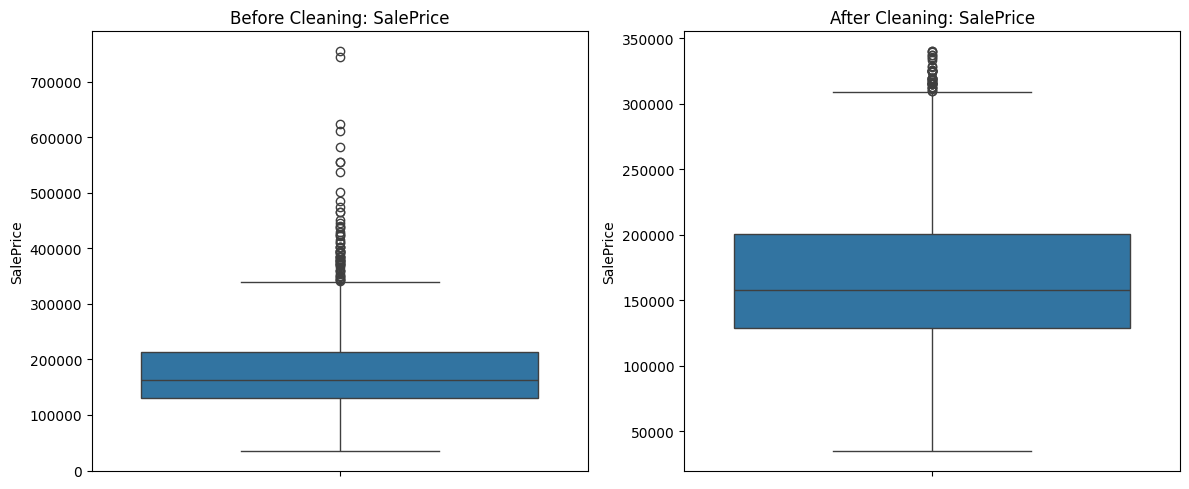

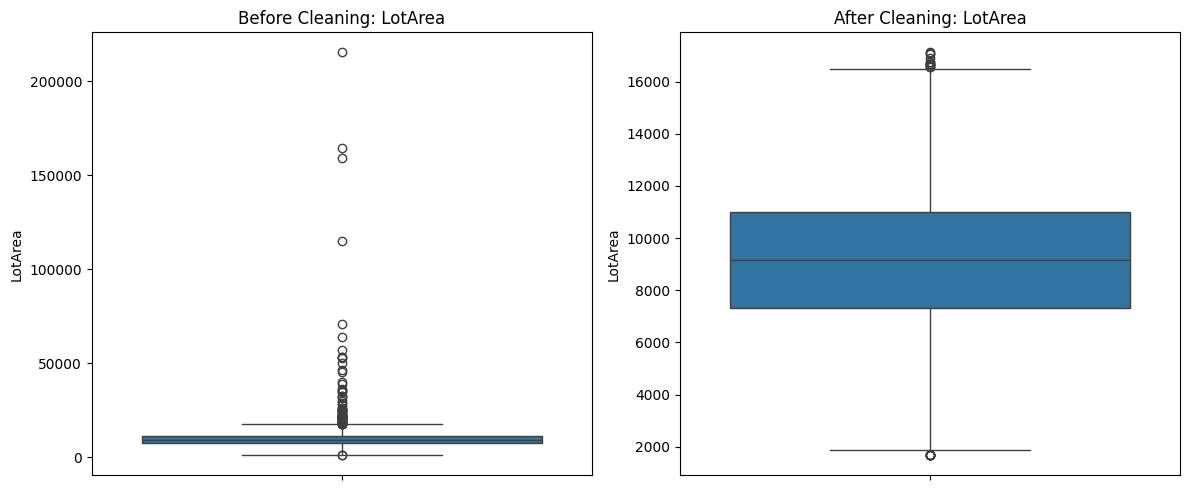

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_check = ["SalePrice", "LotArea"]

for col in cols_to_check:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Before Cleaning
    sns.boxplot(y=house_df[col], ax=axes[0])
    axes[0].set_title(f"Before Cleaning: {col}")
    
    # After Cleaning
    sns.boxplot(y=df_no_outliers[col], ax=axes[1])
    axes[1].set_title(f"After Cleaning: {col}")
    
    plt.tight_layout()
    plt.show()

Task 4: String Cleaning & Standardization
●	Dataset: IMDb Movies Dataset


In [9]:
imdb_df = pd.read_csv("IMDB.csv")
print("Initial IMDB DataFrame:", imdb_df.shape)
imdb_df.head()

Initial IMDB DataFrame: (1000, 16)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [11]:
string_cols = imdb_df.select_dtypes(include=['object']).columns
print(f"String Columns Found: {len(string_cols)}")
print(list(string_cols))

String Columns Found: 13
['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross']


In [12]:
def clean_string_columns(dataframe, columns):

    for col in columns:
        # Strip leading/trailing spaces
        dataframe[col] = dataframe[col].astype(str).str.strip()
        
        # Replace multiple spaces with a single space
        dataframe[col] = dataframe[col].str.replace(r'\s+', ' ', regex=True)
        
        # Handle column-specific rules
        if "Genre" in col:
            dataframe[col] = dataframe[col].str.lower()  # genres in lowercase
        elif "Star" in col or "Director" in col:
            dataframe[col] = dataframe[col].str.title()  # names in title case
        elif "Title" in col:
            dataframe[col] = dataframe[col].str.title()  # movie titles in title case
        
    return dataframe

In [13]:
df_cleaned = clean_string_columns(imdb_df.copy(), string_cols)

In [14]:
df_cleaned.to_csv("imdb_cleaned.csv", index=False)
print(" Cleaned IMDb dataset saved as 'imdb_cleaned.csv'")

 Cleaned IMDb dataset saved as 'imdb_cleaned.csv'


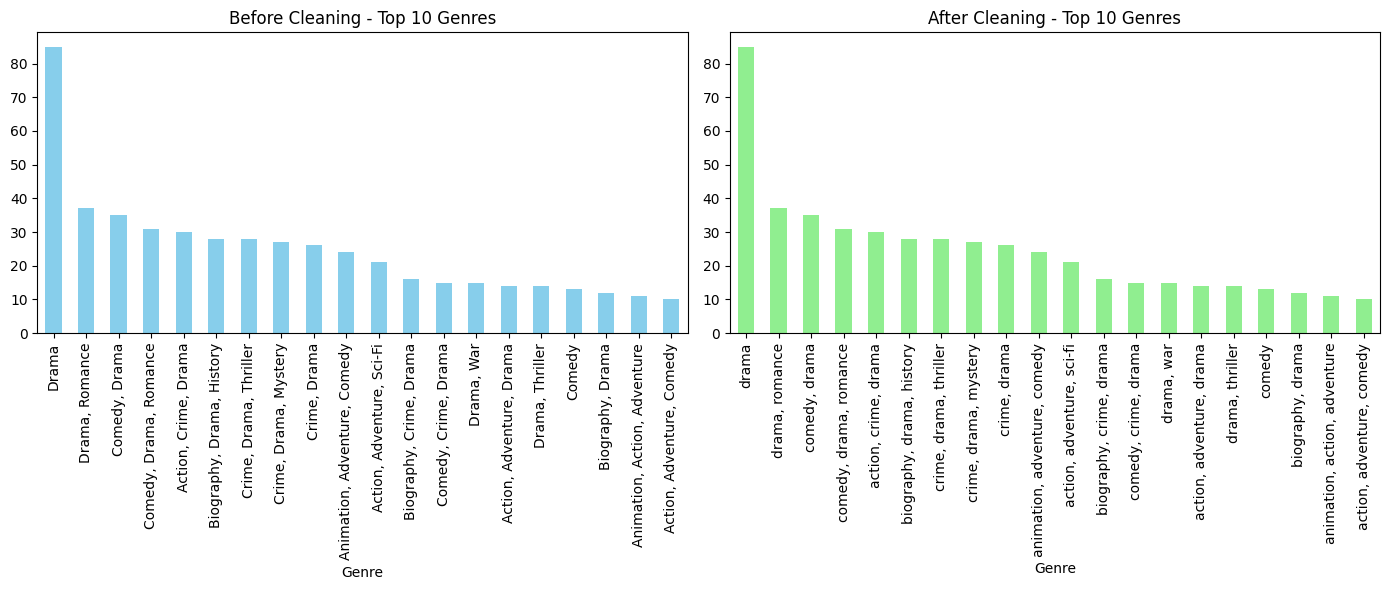

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before Cleaning
imdb_df['Genre'].value_counts().head(20).plot(kind='bar', ax=axes[0], color="skyblue")
axes[0].set_title("Before Cleaning - Top 20 Genres")

# After Cleaning
df_cleaned['Genre'].value_counts().head(20).plot(kind='bar', ax=axes[1], color="lightgreen")
axes[1].set_title("After Cleaning - Top 20 Genres")

plt.tight_layout()
plt.show()